In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("vgsales.csv")

### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии.

([<matplotlib.axis.XTick at 0x283d7c974f0>,
 [Text(0.0, 0, '0.000'),
  Text(1.022, 0, '1.022'),
  Text(2.044, 0, '2.044'),
  Text(3.066, 0, '3.066'),
  Text(4.088, 0, '4.088'),
  Text(5.11, 0, '5.110'),
  Text(6.132, 0, '6.132'),
  Text(7.154, 0, '7.154'),
  Text(8.176, 0, '8.176'),
  Text(9.198, 0, '9.198')])

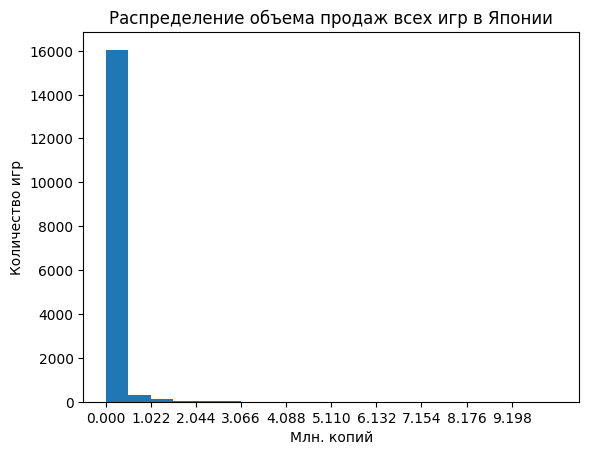

In [43]:
serie = df["JP_Sales"]
plt.hist(serie, bins=20)
plt.title('Распределение объема продаж всех игр в Японии')
plt.xlabel("Млн. копий")
plt.ylabel("Количество игр")

bin_width = serie.max() / 10
x_range = [i*bin_width for i in range(10)]

plt.xticks(x_range)


### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах.

In [27]:
serie1 = df[df["Name"] == "Grand Theft Auto V"]


Text(0, 0.5, 'Млн. копий')

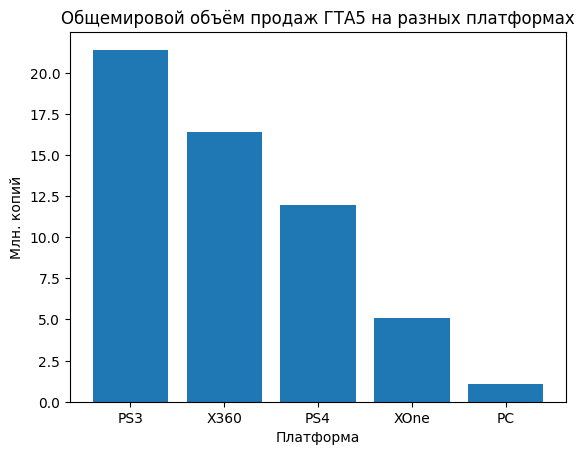

In [26]:
plt.bar(serie1["Platform"], serie1["Global_Sales"])
plt.title("Общемировой объём продаж ГТА5 на разных платформах")
plt.xlabel("Платформа")
plt.ylabel("Млн. копий")

### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам.

Text(0, 0.5, 'Млн. копий')

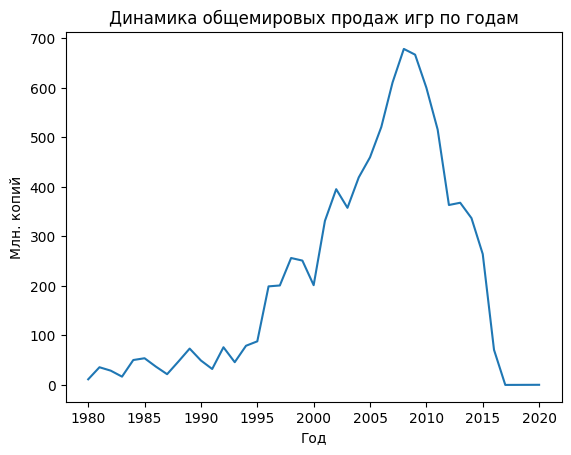

In [40]:
sales_by_year = df.groupby("Year")["Global_Sales"].sum()

plt.plot(sales_by_year.index, sales_by_year.values)
plt.title("Динамика общемировых продаж игр по годам")
plt.xlabel("Год")
plt.ylabel("Млн. копий")

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке.

Text(0, 0.5, 'Продажи по всему миру (млн. копий)')

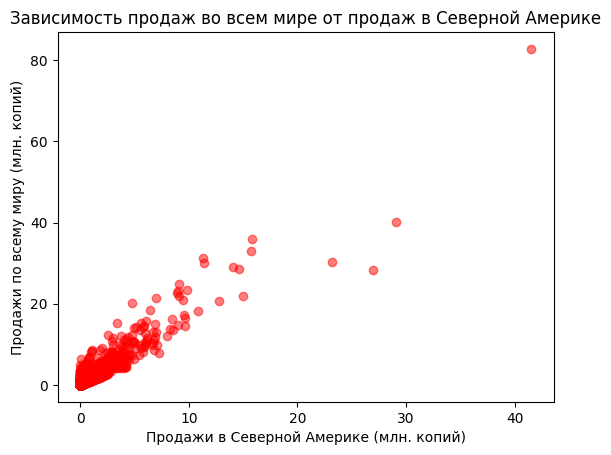

In [56]:
plt.scatter(df['NA_Sales'], df['Global_Sales'], alpha=0.5, color='red')
plt.title('Зависимость продаж во всем мире от продаж в Северной Америке')
plt.xlabel('Продажи в Северной Америке (млн. копий)')
plt.ylabel('Продажи по всему миру (млн. копий)')

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

In [59]:
serie = df[df["Name"] == "Super Mario Bros."].groupby("Platform")["Global_Sales"].sum()
serie

Platform
GB      5.07
NES    40.24
Name: Global_Sales, dtype: float64

Text(0.5, 1.0, 'Продажи Mario Bros. на разных платформах во всём мире')

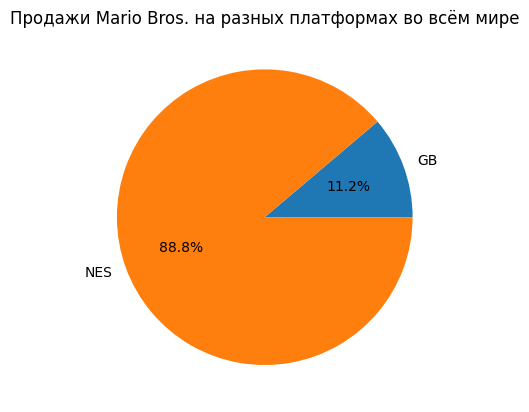

In [61]:
plt.pie(serie, labels=serie.index, autopct="%1.1f%%")
plt.title("Продажи Mario Bros. на разных платформах во всём мире")

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всём мире в 2013 году, и проиллюстрируйте величину их продаж на столбчатой диаграмме.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Nintendo'),
  Text(2, 0, 'Take-Two Interactive'),
  Text(3, 0, 'Activision'),
  Text(4, 0, 'Ubisoft')])

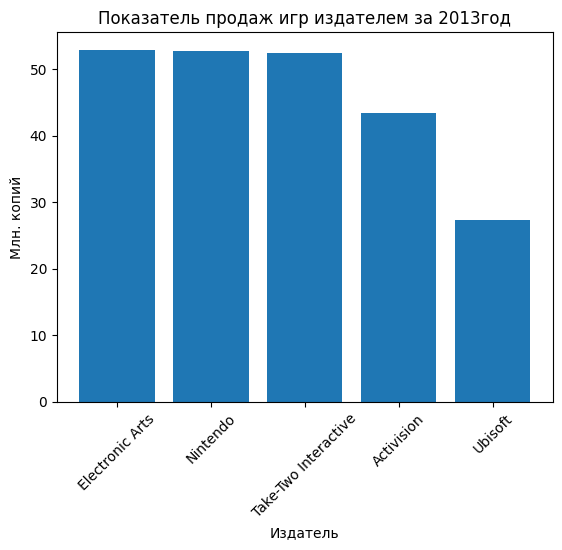

In [75]:
serie = df[df["Year"] == 2013.0].groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(5)
plt.bar(serie.index, serie.values)
plt.title("Показатель продаж игр издателем за 2013год")
plt.xlabel("Издатель")
plt.ylabel("Млн. копий")
plt.xticks(rotation=45)

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

In [100]:
serie = df[df["Publisher"] != "Nintendo"][(df["Year"] >= 2000.0) & (df["Year"] <= 2015.0)]["Global_Sales"]
serie

C:\Temp\ipykernel_7692\1812664995.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  serie = df[df["Publisher"] != "Nintendo"][(df["Year"] >= 2000.0) & (df["Year"] <= 2015.0)]["Global_Sales"]


15       21.82
16       21.40
17       20.81
23       16.38
24       16.15
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 13490, dtype: float64

(array([1.3029e+04, 3.2800e+02, 7.3000e+01, 2.9000e+01, 1.2000e+01,
        5.0000e+00, 9.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([1.0000e-02, 2.1910e+00, 4.3720e+00, 6.5530e+00, 8.7340e+00,
        1.0915e+01, 1.3096e+01, 1.5277e+01, 1.7458e+01, 1.9639e+01,
        2.1820e+01]),
 <BarContainer object of 10 artists>)

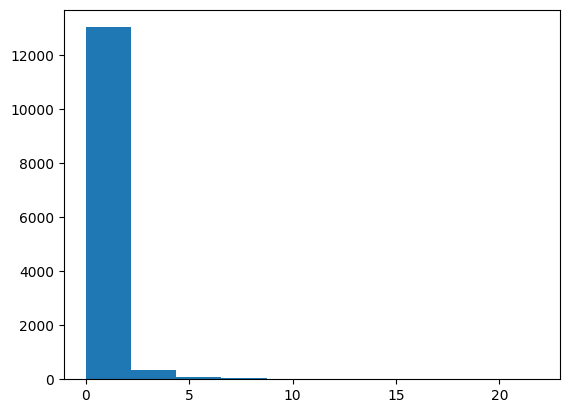

In [101]:
plt.hist(serie)
